<a href="https://colab.research.google.com/github/santhosh47/Data_Science_and_ML_Tutorial/blob/main/DS_41_Multiple_Linear_Regression_Adjusted_R_Squared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So far, we learned about the simple linear regression.
We predicted the dependent variable Y
with a single regressor X.It is time to level up.

### **Example:1**

Now, we said that in real life
a person's income does not depend solely on education
but also on their experience, the time they have spent
with their current employer and so on.

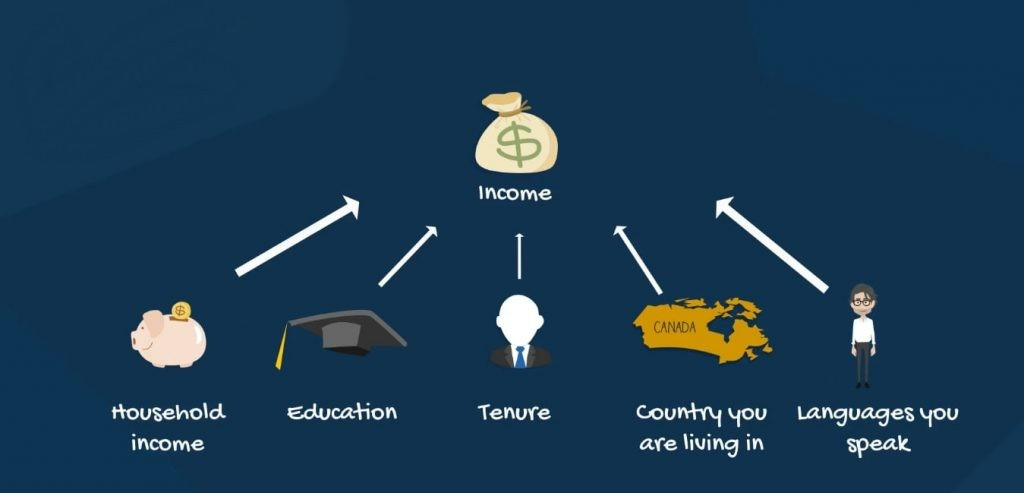

###**Example:2**

House prices do not depend solely on their size
but also on location and year of construction.

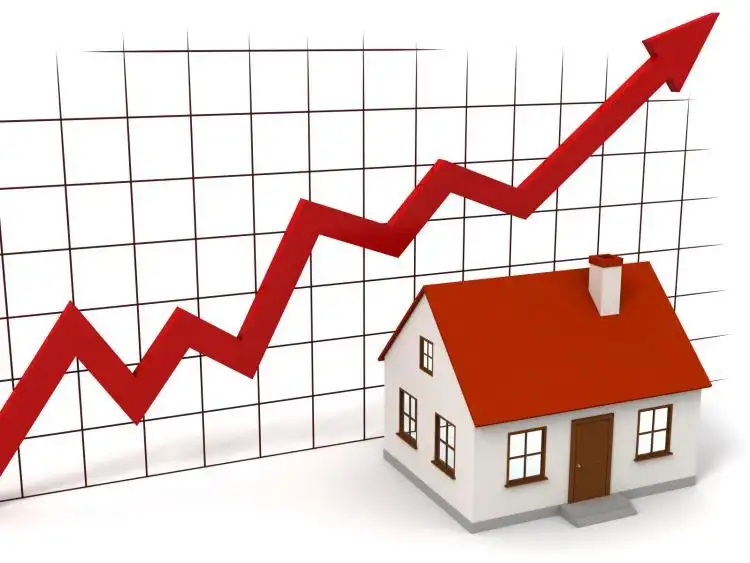

## **Example:3**

College GPA cannot be predicted solely by a
student's SAT score,
but also by their high school GPA, income, gender
and so on.

If we wanna make good models, we need multiple regressions.
**Multiple regressions address the higher
complexity of problems.**

The more variables you have,
the more factors you are considering in a model.
In the real world, things depend on two, three,
or even 10 or 20 factors.

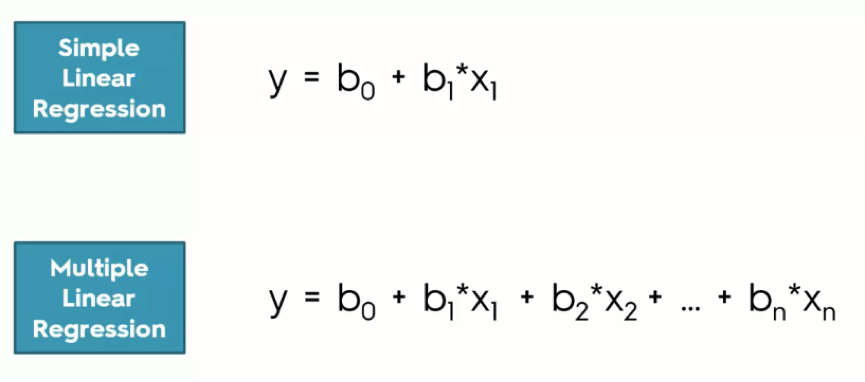

All right, so this is the population
multiple regression model.
It is similar to a simple regression.
The main difference is there are a bunch
of independent variables, not just one.
What we are interested
in is the multiple regression equation.
We want to plug in numbers and predict outcomes, right?

Once again, Y hat is the inferred value?

And B0 is the intercept.
The independent variables range from X1 to XK.
B1 to BK are their corresponding coefficients.
The last thing to say about multiple regressions is
that it's **not about the best fitting line anymore.**

Actually, it stops being two dimensional
and when we have over three dimensions,
there is no visual way to represent the data.

So if it is not about the line, what is it about?
**It's about the best fitting model.**
As we saw from the OLS,
what we really want is the least sum of squared errors.

##**All right, so how do we decrease the model's error?**
Well, by increasing the explanatory power of the model.
SSC and SSR are like communicating vessels.
Remember, each time we lower one, the other goes higher.
With each additional variable,
we increase the explanatory power
by zero or more than zero, we cannot lower it.
 More variables usually equal a better fitting model.

# **The Adjusted R-squared**
The R-squared seems quite useful, doesn’t it? However, it is not perfect. To be more precise, we’ll have to refine it. Its new version will be called the adjusted R-squared.

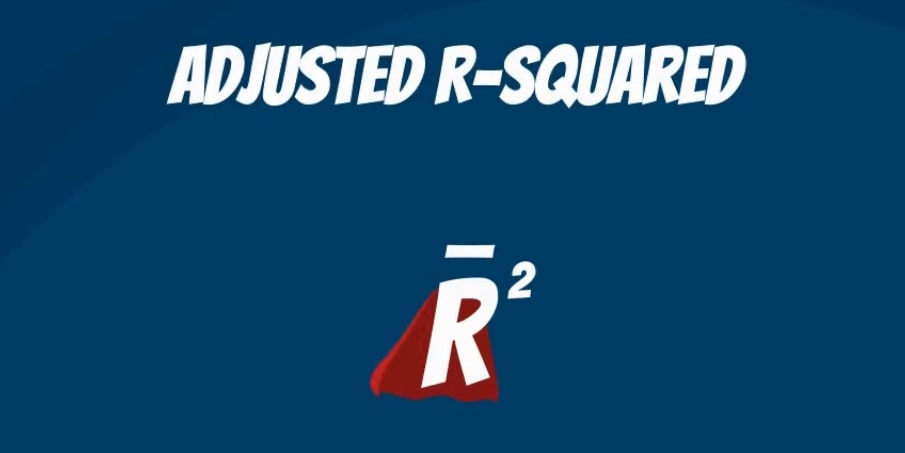

## **Let’s consider the following two statements:**

1. The R-squared measures how much of the total variability is explained by our model.
2. Multiple regressions are always better than simple ones. This is because with each additional variable that you add, the explanatory power may only increase or stay the same.

Well, the adjusted R-squared considers exactly that. It measures how much of the total variability our model explains, considering the number of variables.

The adjusted R-squared is always smaller than the R-squared, as it penalizes excessive use of variables.


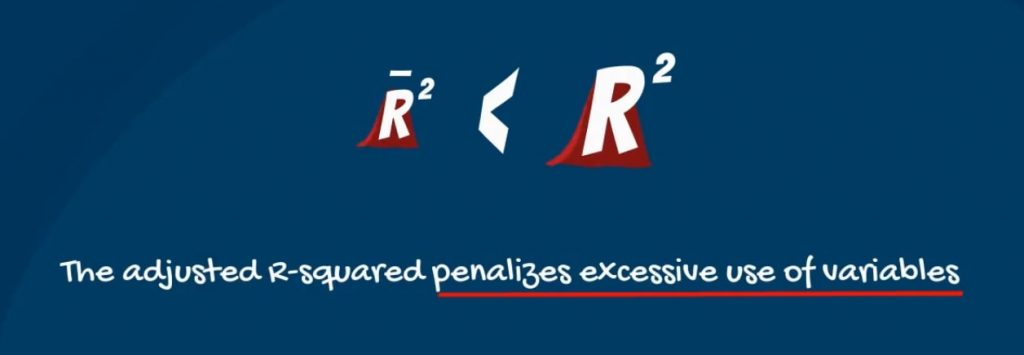


## **Multiple Regressions**
Let’s create our first multiple regression to explain this point.

First, we’ll import all the relevant libraries.

This is what we need to code:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

We can load the data from the file ‘1.02. Multiple linear regression.csv’. [You can download it from the following link](https://365datascience.com/resources/downloadables/1.02.%20Multiple%20linear%20regression.csv). The way to load it is the following:

In [ ]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

## **An Additional Variable**
Let’s type ‘data’ and run the code.

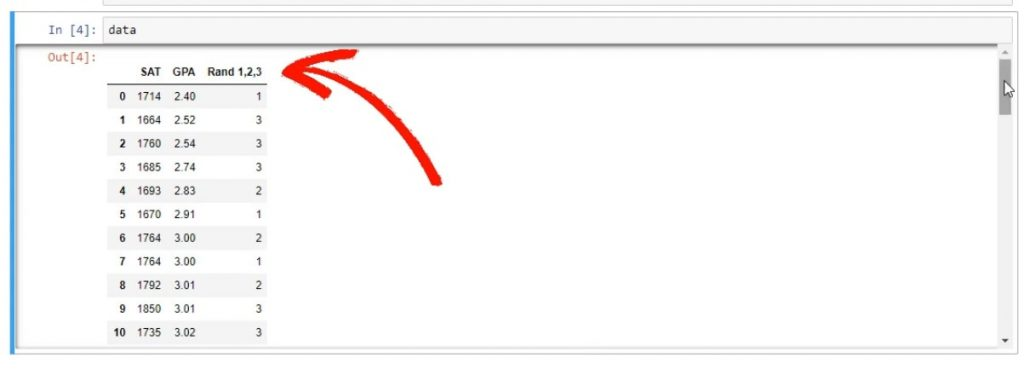

As you can see from the picture above, we have data about the SAT and GPA results of students. However, there is one additional variable, called Rand 1,2,3. We’ve generated a variable that assigns 1, 2, or 3, randomly to each student. We are 100% sure that this variable cannot predict college GPA.

So, this is our model: college GPA is equal to b0+ b1 * SAT score +b2 * the random variable.

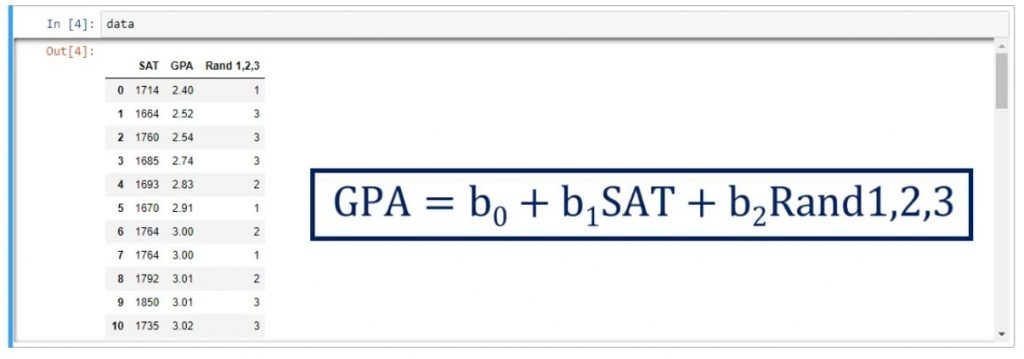

Now, let’s write ‘data.describe()’ and see the descriptive statistics.

In [ ]:
data.describe()

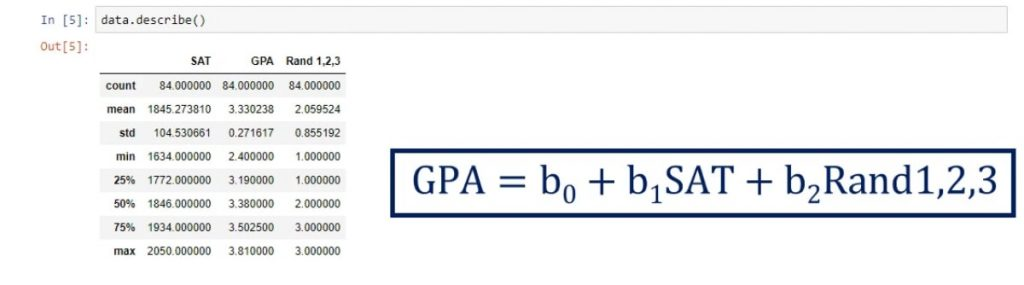

## **Creating the Regression**
In our case, y is GPA and there are 2 explanatory variables – SAT and Random 1,2,3.

What we can do is declare x1 as a data frame, containing both series. So, the code should look like this:

In [ ]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

we must fit the regression:

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

After that, we can check out the regression tables using the appropriate method

In [ ]:
results.summary()

You can see the ones from the previously linked tutorial in the box on the right. Keep in mind, that we only have 1 variable there.

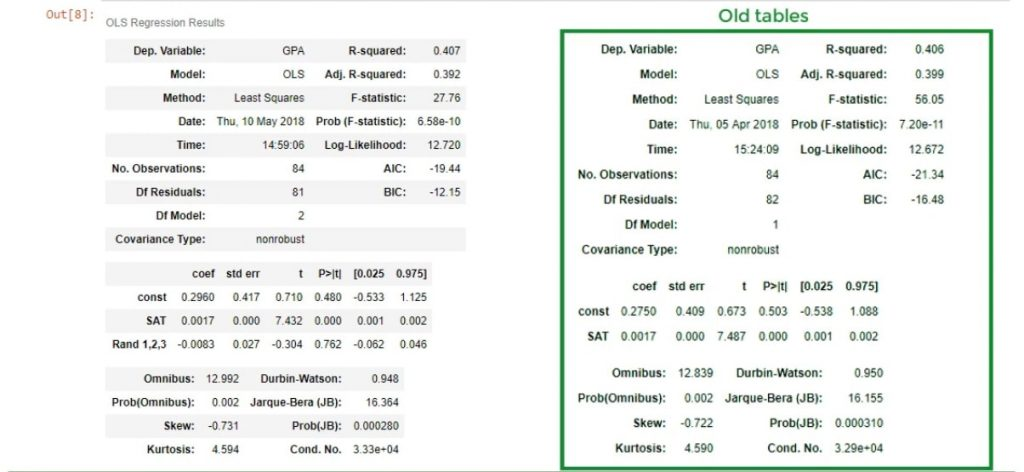

## **The New R-squared**
We notice that the new R-squared is 0.407, so it seems as we have increased the explanatory power of the model. But then our enthusiasm is dampened by the adjusted R-squared of 0.392.

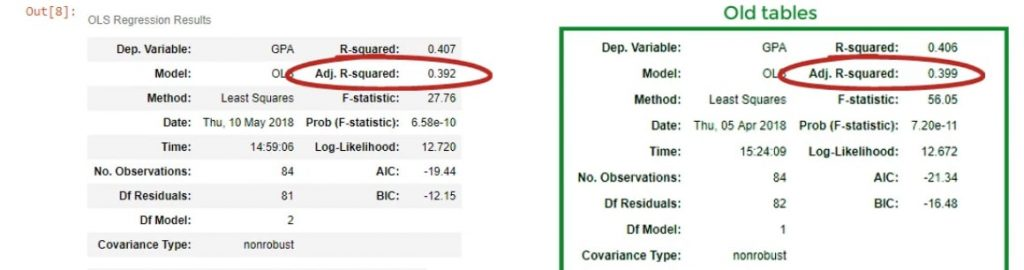

We were penalized for adding an additional variable that had no strong explanatory power. We have added information but have lost value.

Important: The point is that you should cherry-pick your data and exclude useless information.

However, one would assume regression analysis is smarter than that. Adding an impractical variable should be pointed out by the model in some way.

Well, that’s true. Let’s take a look at the coefficients table. We have determined a coefficient for the Rand 1,2,3 variable, but its P-value is 0.762!

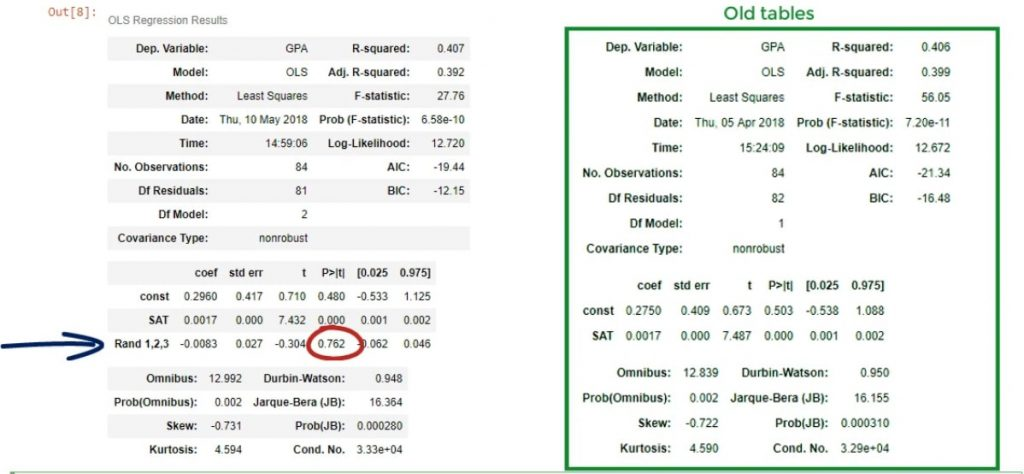

## **The Null Hypothesis**
The null hypothesis of the test is that β = 0. We cannot reject the null hypothesis at the 76% significance level!

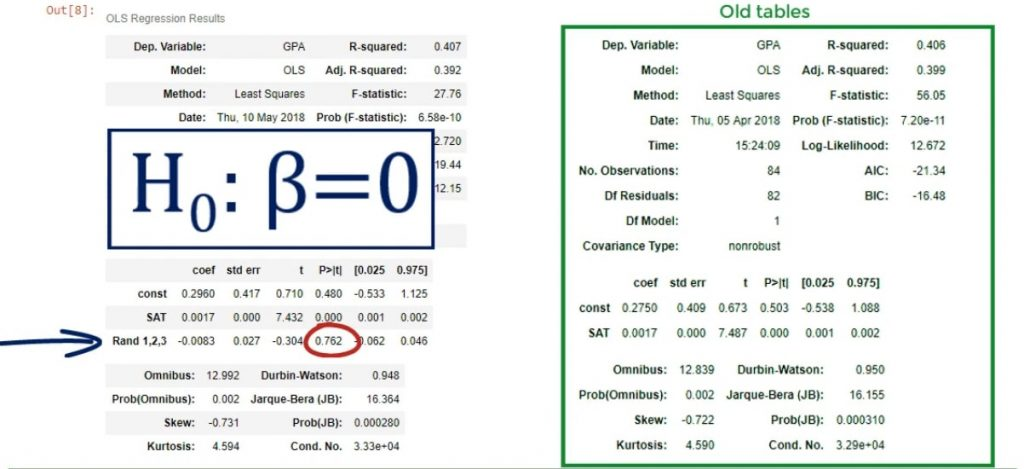

This is an incredibly high P-value.

Important: For a coefficient to be statistically significant, we usually want a P-value of less than 0.05.

Our conclusion is that the variable Rand 1,2,3 not only worsens the explanatory power of the model, reflected by a lower adjusted R-squared but is also insignificant. Therefore, it should be dropped altogether.

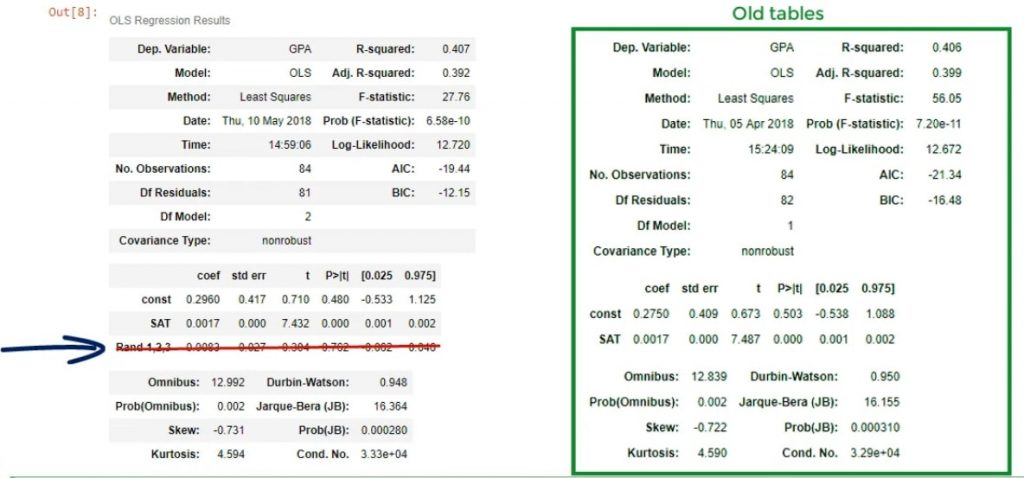

## **Dropping Useless Variables**
Dropping useless variables is important. You can see the original model changed from:

ŷ = 0.275 + 0.0017* x1

to

ŷ = 0.296+ 0.0017* x1- 0.0083 * x2

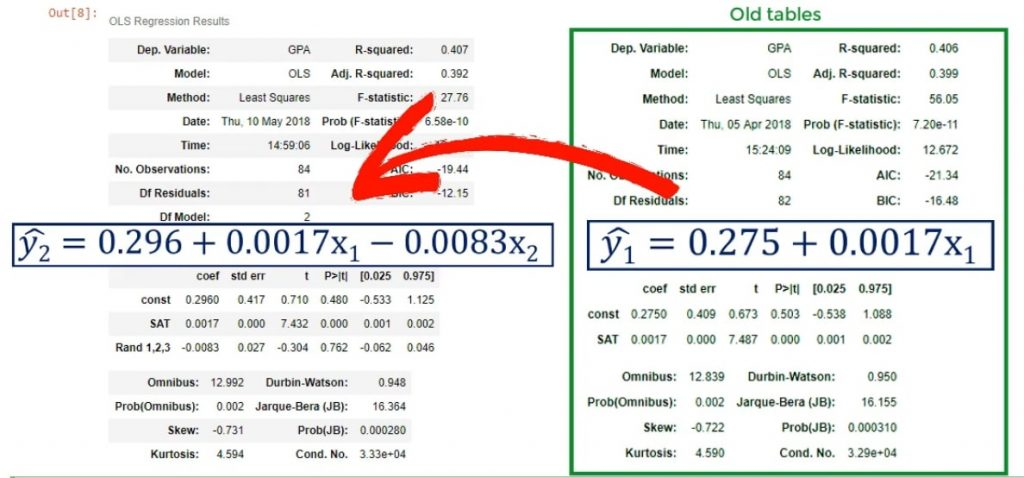

The choice of the third variable affected the intercept. Whenever you have one variable that is ruining the model, you should not use this model altogether. This is because the bias of this variable is reflected in the coefficients of the other variables. The correct approach is to remove it from the regression and run a new one, omitting the problematic predictor.

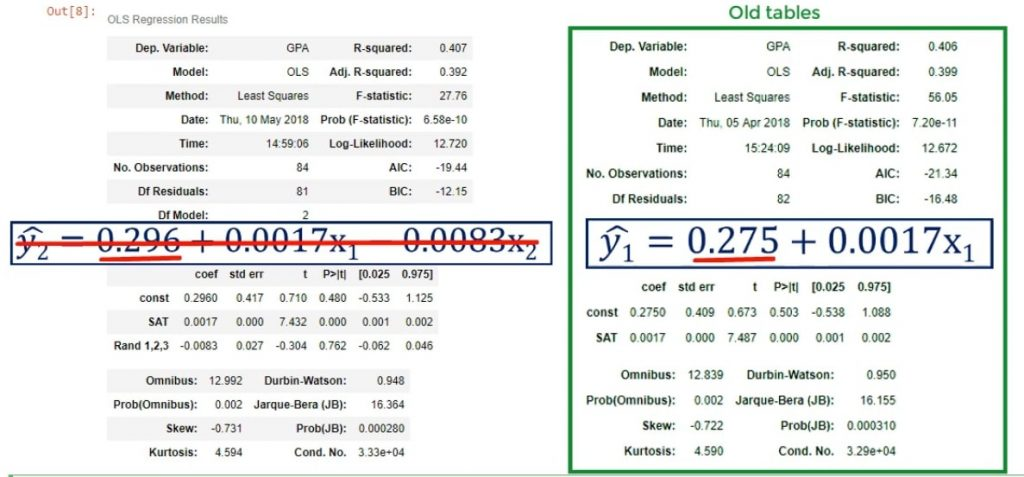

# **Simplicity**
There is one more consideration concerning the removal of variables from a model. We can add 100 different variables to a model and probably the predictive power of the model will be outstanding. However, this strategy makes regression analysis futile. We are trying to use a few independent variables that approximately predict the result. The trade-off is complex, but simplicity is better rewarded than higher explanatory power.

# **How to Compare Regression Models?**
Finally, the adjusted R-squared is the basis for comparing regression models. Once again, it only makes sense to compare two models considering the same dependent variable and using the same dataset. If we compare two models that are about two different dependent variables, we will be making an apples-to-oranges comparison. If we use different datasets, it is an apples-to-dinosaurs problem.

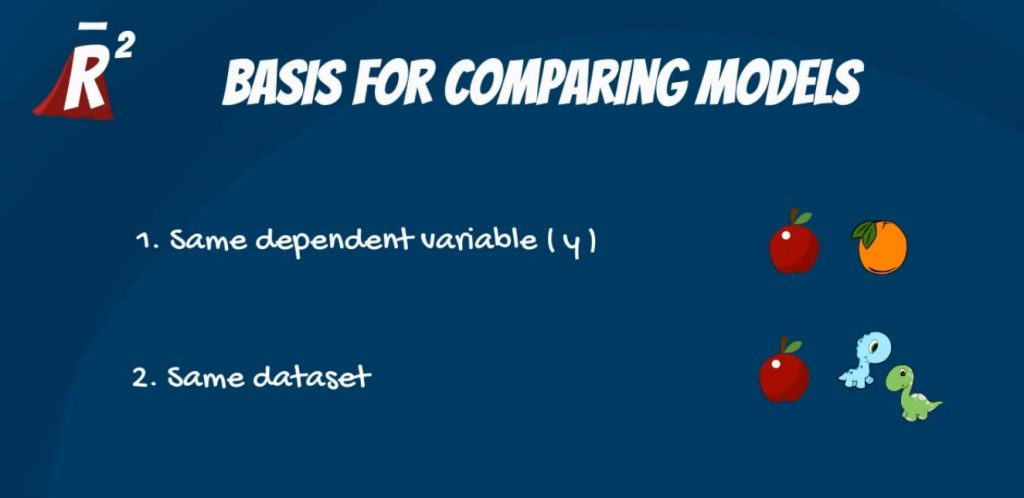

As you can see, adjusted R-squared is a step in the right direction, but should not be the only measure trusted. Caution is advised, whereas thorough logic and diligence are mandatory.

# **What We’ve Learned**
To sum up, the R-squared basically tells us how much of our data’s variability is explained by the regression line. The best value for an R-squared depends on the particular case. When we feel like we are missing important information, we can simply add more factors. This is where the adjusted R-squared comes into play. It measures the variability of our model but it also considers the number of variables. Therefore, it is always smaller than the R-squared. Moreover, the adjusted R-squared is the basis for comparing regression models.

##**The F-statistic**
The last measure we will discuss is the F-statistic. We will explain its essence and see how it can be useful to us.

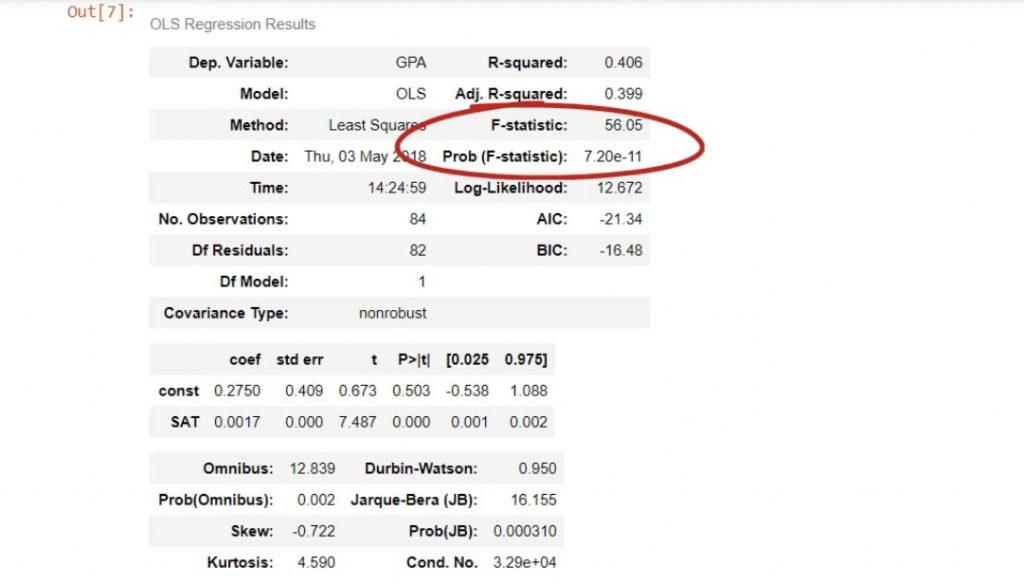

Much like the Z-statistic which follows a normal distribution and the T-statistic that follows a Student’s T distribution, the F-statistic follows an [F distribution](http://mathworld.wolfram.com/F-Distribution.html).

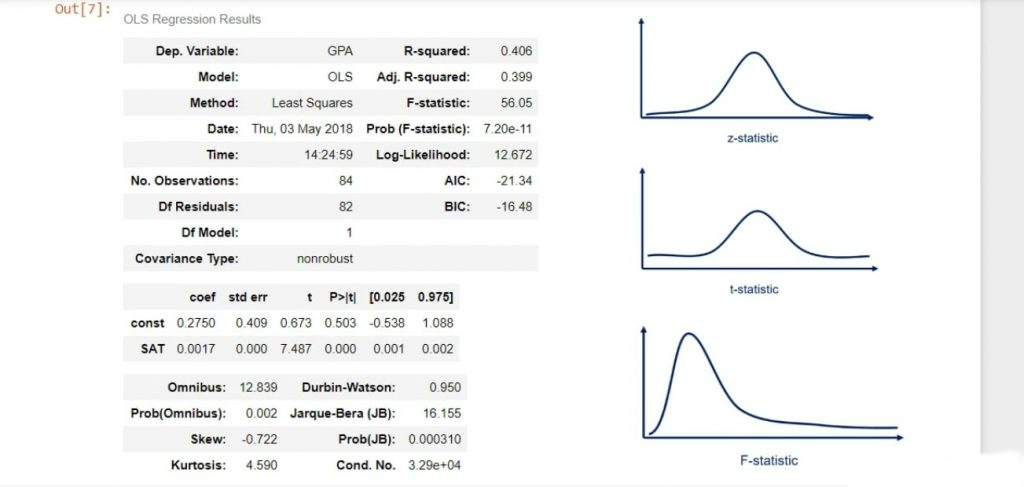

We are calling it a statistic, which means that it is used for tests. The test is known as the test for overall significance of the model.

#**The Null Hypothesis and the Alternative Hypothesis**
**The null hypothesis is:** all the βs are equal to zero simultaneously.

**The alternative hypothesis is:** at least one β differs from zero.

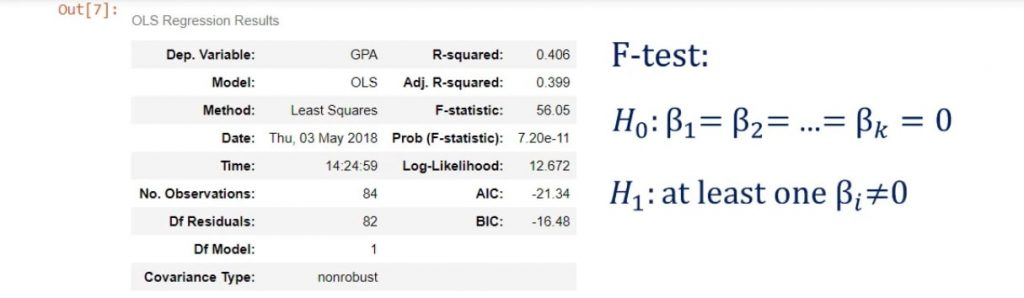

This is the interpretation: if all βs are zero, then none of the independent variables matter. Therefore, our model has no merit.

In our case, the F-statistic is 56.05.

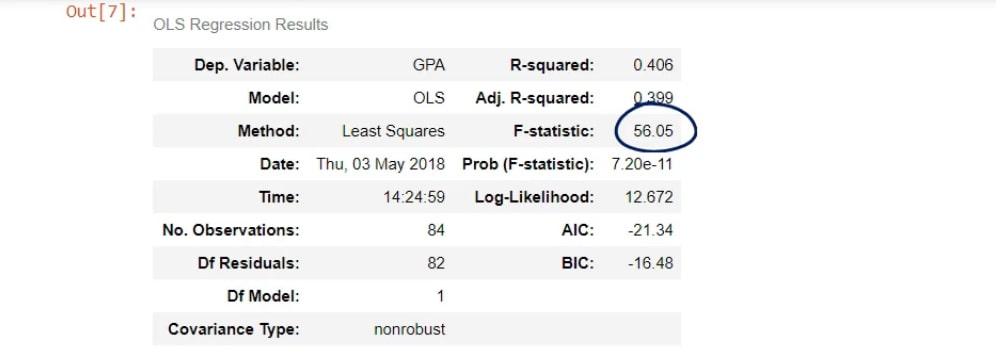

The cell below is its P-value.

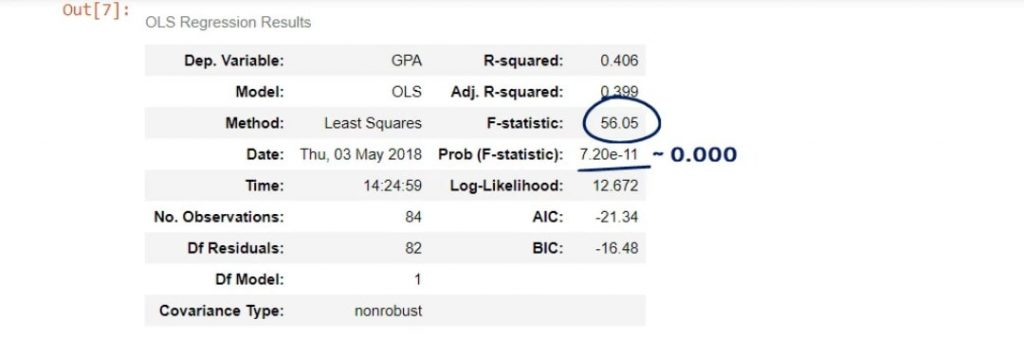

As you can see, the number is really low – it is virtually 0.000. We say the overall model is significant.

**Important:** Notice how the P-value is a universal measure for all tests. There is an F-table used for the F-statistic, but we don’t need it, because the P-value notion is so powerful.

The F-test is important for regressions, as it gives us some important insights. Remember, the lower the F-statistic, the closer to a non-significant model.

Moreover, don’t forget to look for the three zeroes after the dot!